In [ ]:
!pip install -q kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
! kaggle datasets download -d mashlyn/online-retail-ii-uci

Dataset URL: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci
License(s): CC0-1.0
  0% 0.00/14.5M [00:00<?, ?B/s]
100% 14.5M/14.5M [00:00<00:00, 1.13GB/s]


In [ ]:
!unzip online-retail-ii-uci.zip

Archive:  online-retail-ii-uci.zip
  inflating: online_retail_II.csv    


# Get data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('online_retail_II.csv')

In [ ]:
france_df = df[df["Country"]=="France"]
france_df.head()

Invoice StockCode                        Description  Quantity  \
71  489439     22065     CHRISTMAS PUDDING TRINKET POT         12   
72  489439     22138      BAKING SET 9 PIECE RETROSPOT          9   
73  489439     22139  RETRO SPOT TEA SET CERAMIC 11 PC          9   
74  489439     22352   LUNCHBOX WITH CUTLERY RETROSPOT         12   
75  489439    85014A   BLACK/BLUE DOTS RUFFLED UMBRELLA         3   

            InvoiceDate  Price  Customer ID Country  
71  2009-12-01 09:28:00   1.45      12682.0  France  
72  2009-12-01 09:28:00   4.95      12682.0  France  
73  2009-12-01 09:28:00   4.95      12682.0  France  
74  2009-12-01 09:28:00   2.55      12682.0  France  
75  2009-12-01 09:28:00   5.95      12682.0  France

In [ ]:
transactions = pd.get_dummies(france_df[["Invoice","StockCode"]], columns=["StockCode"]).groupby(["Invoice"]).any()
transactions

StockCode_10002  StockCode_10120  StockCode_10123C  StockCode_10123G  \
Invoice                                                                         
489439             False            False             False             False   
489557             False            False             False             False   
489883             False            False             False             False   
490139             False            False             False             False   
490152             False            False             False             False   
...                  ...              ...               ...               ...   
C579532            False            False             False             False   
C579562            False            False             False             False   
C580161            False            False             False             False   
C580263            False            False             False             False   
C581316            False            False             False             False   

         StockCode_10125  StockCode_10135  StockCode_11001  StockCode_15036  \
Invoice                                                                       
489439             False            False            False            False   
489557             False            False            False            False   
489883             False            False            False            False   
490139             False            False            False            False   
490152             False            False            False            False   
...                  ...              ...              ...              ...   
C579532            False            False            False            False   
C579562            False            False            False            False   
C580161            False            False            False            False   
C580263            False            False            False            False   
C581316            False            False            False            False   

         StockCode_15039  StockCode_15044C  ...  StockCode_90208  \
Invoice                                     ...                    
489439             False             False  ...            False   
489557             False             False  ...            False   
489883             False             False  ...            False   
490139             False             False  ...            False   
490152             False             False  ...            False   
...                  ...               ...  ...              ...   
C579532            False             False  ...            False   
C579562            False             False  ...            False   
C580161            False             False  ...            False   
C580263            False             False  ...            False   
C581316            False             False  ...            False   

         StockCode_90209A  StockCode_90214C  StockCode_90214E  \
Invoice                                                         
489439              False             False             False   
489557              False             False             False   
489883              False             False             False   
490139              False             False             False   
490152              False             False             False   
...                   ...               ...               ...   
C579532             False             False             False   
C579562             False             False             False   
C580161             False             False             False   
C580263             False             False             False   
C581316             False             False             False   

         StockCode_90214L  StockCode_90214S  StockCode_ADJUST  StockCode_C2  \
Invoice                                                                       
489439              False             

# K-means

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# assing min k and max k
MIN_K = 2
MAX_K = 20

In [ ]:
result = {}

In [55]:
for k in range(MIN_K, MAX_K):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(transactions)
  result[k] = {
      'labels':kmeans.labels_,
      'centroids':kmeans.cluster_centers_,
      'inertia':kmeans.inertia_,
      'n_iter':kmeans.n_iter_
  }
  print(f'kmeans with k={k}, iterations: {result[k]['n_iter']}, inertia: {result[k]["inertia"]}')

kmeans with k=2, iterations: 2, inertia: 13101.707382550352
kmeans with k=3, iterations: 2, inertia: 13085.948924731167
kmeans with k=4, iterations: 7, inertia: 12571.06393385472
kmeans with k=5, iterations: 2, inertia: 12759.392183288413
kmeans with k=6, iterations: 11, inertia: 12343.838600095507
kmeans with k=7, iterations: 22, inertia: 12433.465712738138
kmeans with k=8, iterations: 13, inertia: 12305.843997557153
kmeans with k=9, iterations: 13, inertia: 12387.569794198685
kmeans with k=10, iterations: 15, inertia: 12183.38838780878
kmeans with k=11, iterations: 10, inertia: 12038.46362694005
kmeans with k=12, iterations: 2, inertia: 12231.746248294658
kmeans with k=13, iterations: 12, inertia: 11950.30889571367
kmeans with k=14, iterations: 6, inertia: 11839.243576056891
kmeans with k=15, iterations: 2, inertia: 12196.205198358428
kmeans with k=16, iterations: 11, inertia: 11980.635376207141
kmeans with k=17, iterations: 13, inertia: 11720.66202157721
kmeans with k=18, iterations

In [56]:
innertia = np.array([[k, result[k]['inertia']] for k in range(MIN_K, MAX_K)])

In [57]:
innertia[:]

array([[2.00000000e+00, 1.31017074e+04],
       [3.00000000e+00, 1.30859489e+04],
       [4.00000000e+00, 1.25710639e+04],
       [5.00000000e+00, 1.27593922e+04],
       [6.00000000e+00, 1.23438386e+04],
       [7.00000000e+00, 1.24334657e+04],
       [8.00000000e+00, 1.23058440e+04],
       [9.00000000e+00, 1.23875698e+04],
       [1.00000000e+01, 1.21833884e+04],
       [1.10000000e+01, 1.20384636e+04],
       [1.20000000e+01, 1.22317462e+04],
       [1.30000000e+01, 1.19503089e+04],
       [1.40000000e+01, 1.18392436e+04],
       [1.50000000e+01, 1.21962052e+04],
       [1.60000000e+01, 1.19806354e+04],
       [1.70000000e+01, 1.17206620e+04],
       [1.80000000e+01, 1.15836902e+04],
       [1.90000000e+01, 1.16710756e+04]])

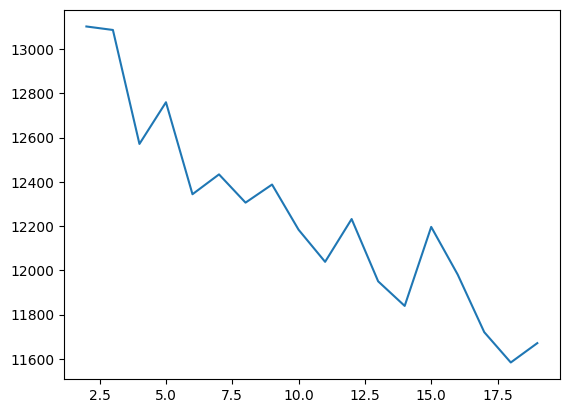

In [58]:
plt.plot(innertia[:,0], innertia[:,1])
plt.show()

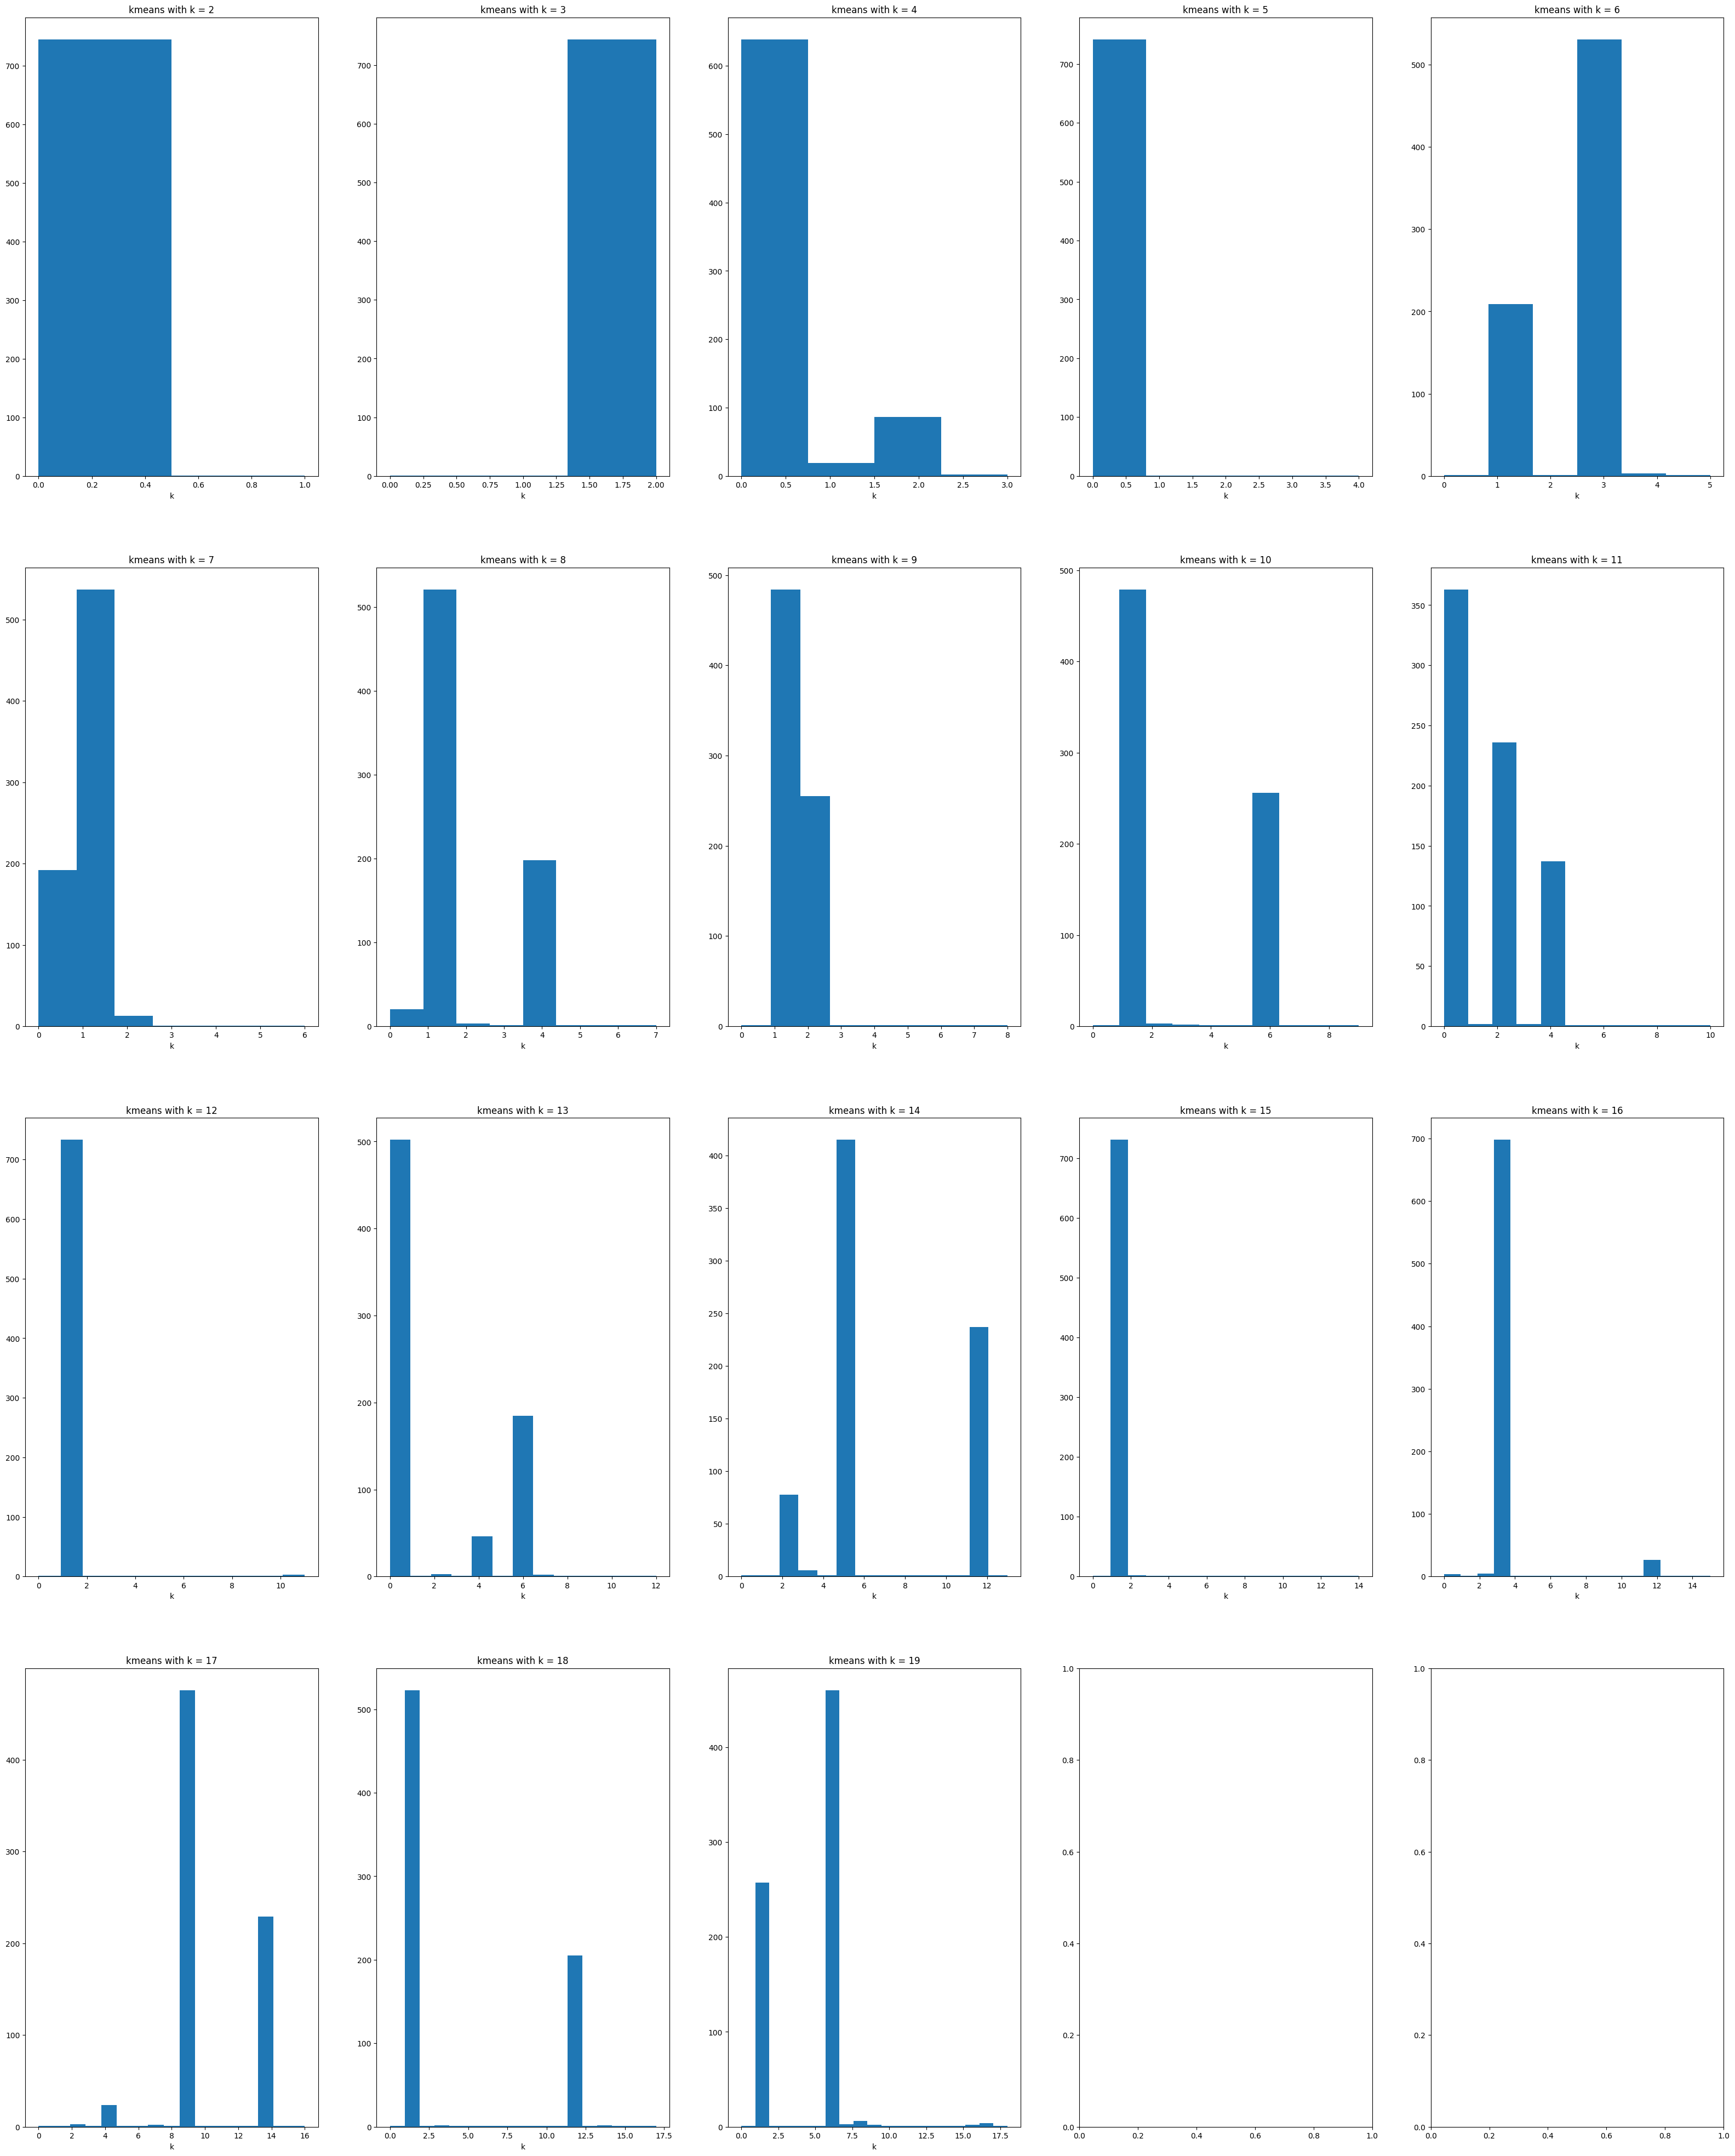

In [59]:
n_k = MAX_K - MIN_K + 1

ncols = 5
nrows = (n_k - 1)// ncols + 1

fix, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*nrows, 10*ncols))

for i,k in enumerate(result):
  row = i//5
  col = i%5
  axs[row][col].hist(result[k]['labels'], bins=k)
  axs[row][col].set_title(f'kmeans with k = {k}')
  axs[row][col].set_xlabel('k')
plt.show()

# Visualization

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=2)

In [62]:
transaction_2d = pca.fit_transform(transactions)

In [63]:
transaction_2d

array([[ 0.0164918 , -0.00584214],
       [ 0.42994499,  0.2680795 ],
       [ 0.30762346, -0.08776137],
       ...,
       [-0.6699284 , -0.02635782],
       [-0.81861884, -0.36213002],
       [-0.87804362, -0.29055411]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/tmp/ipython-input-608308874.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[row][col].scatter(centroids[:,0], centroids[:,1], marker='X', s=100, cmap='tab20b')
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/tmp/ipython-input-608308874.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[row][col].scatter(centroids[:,0], centroids[:,1], marker='X', s=100, cmap='tab20b')
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/tmp/ipython-input-608308874.py

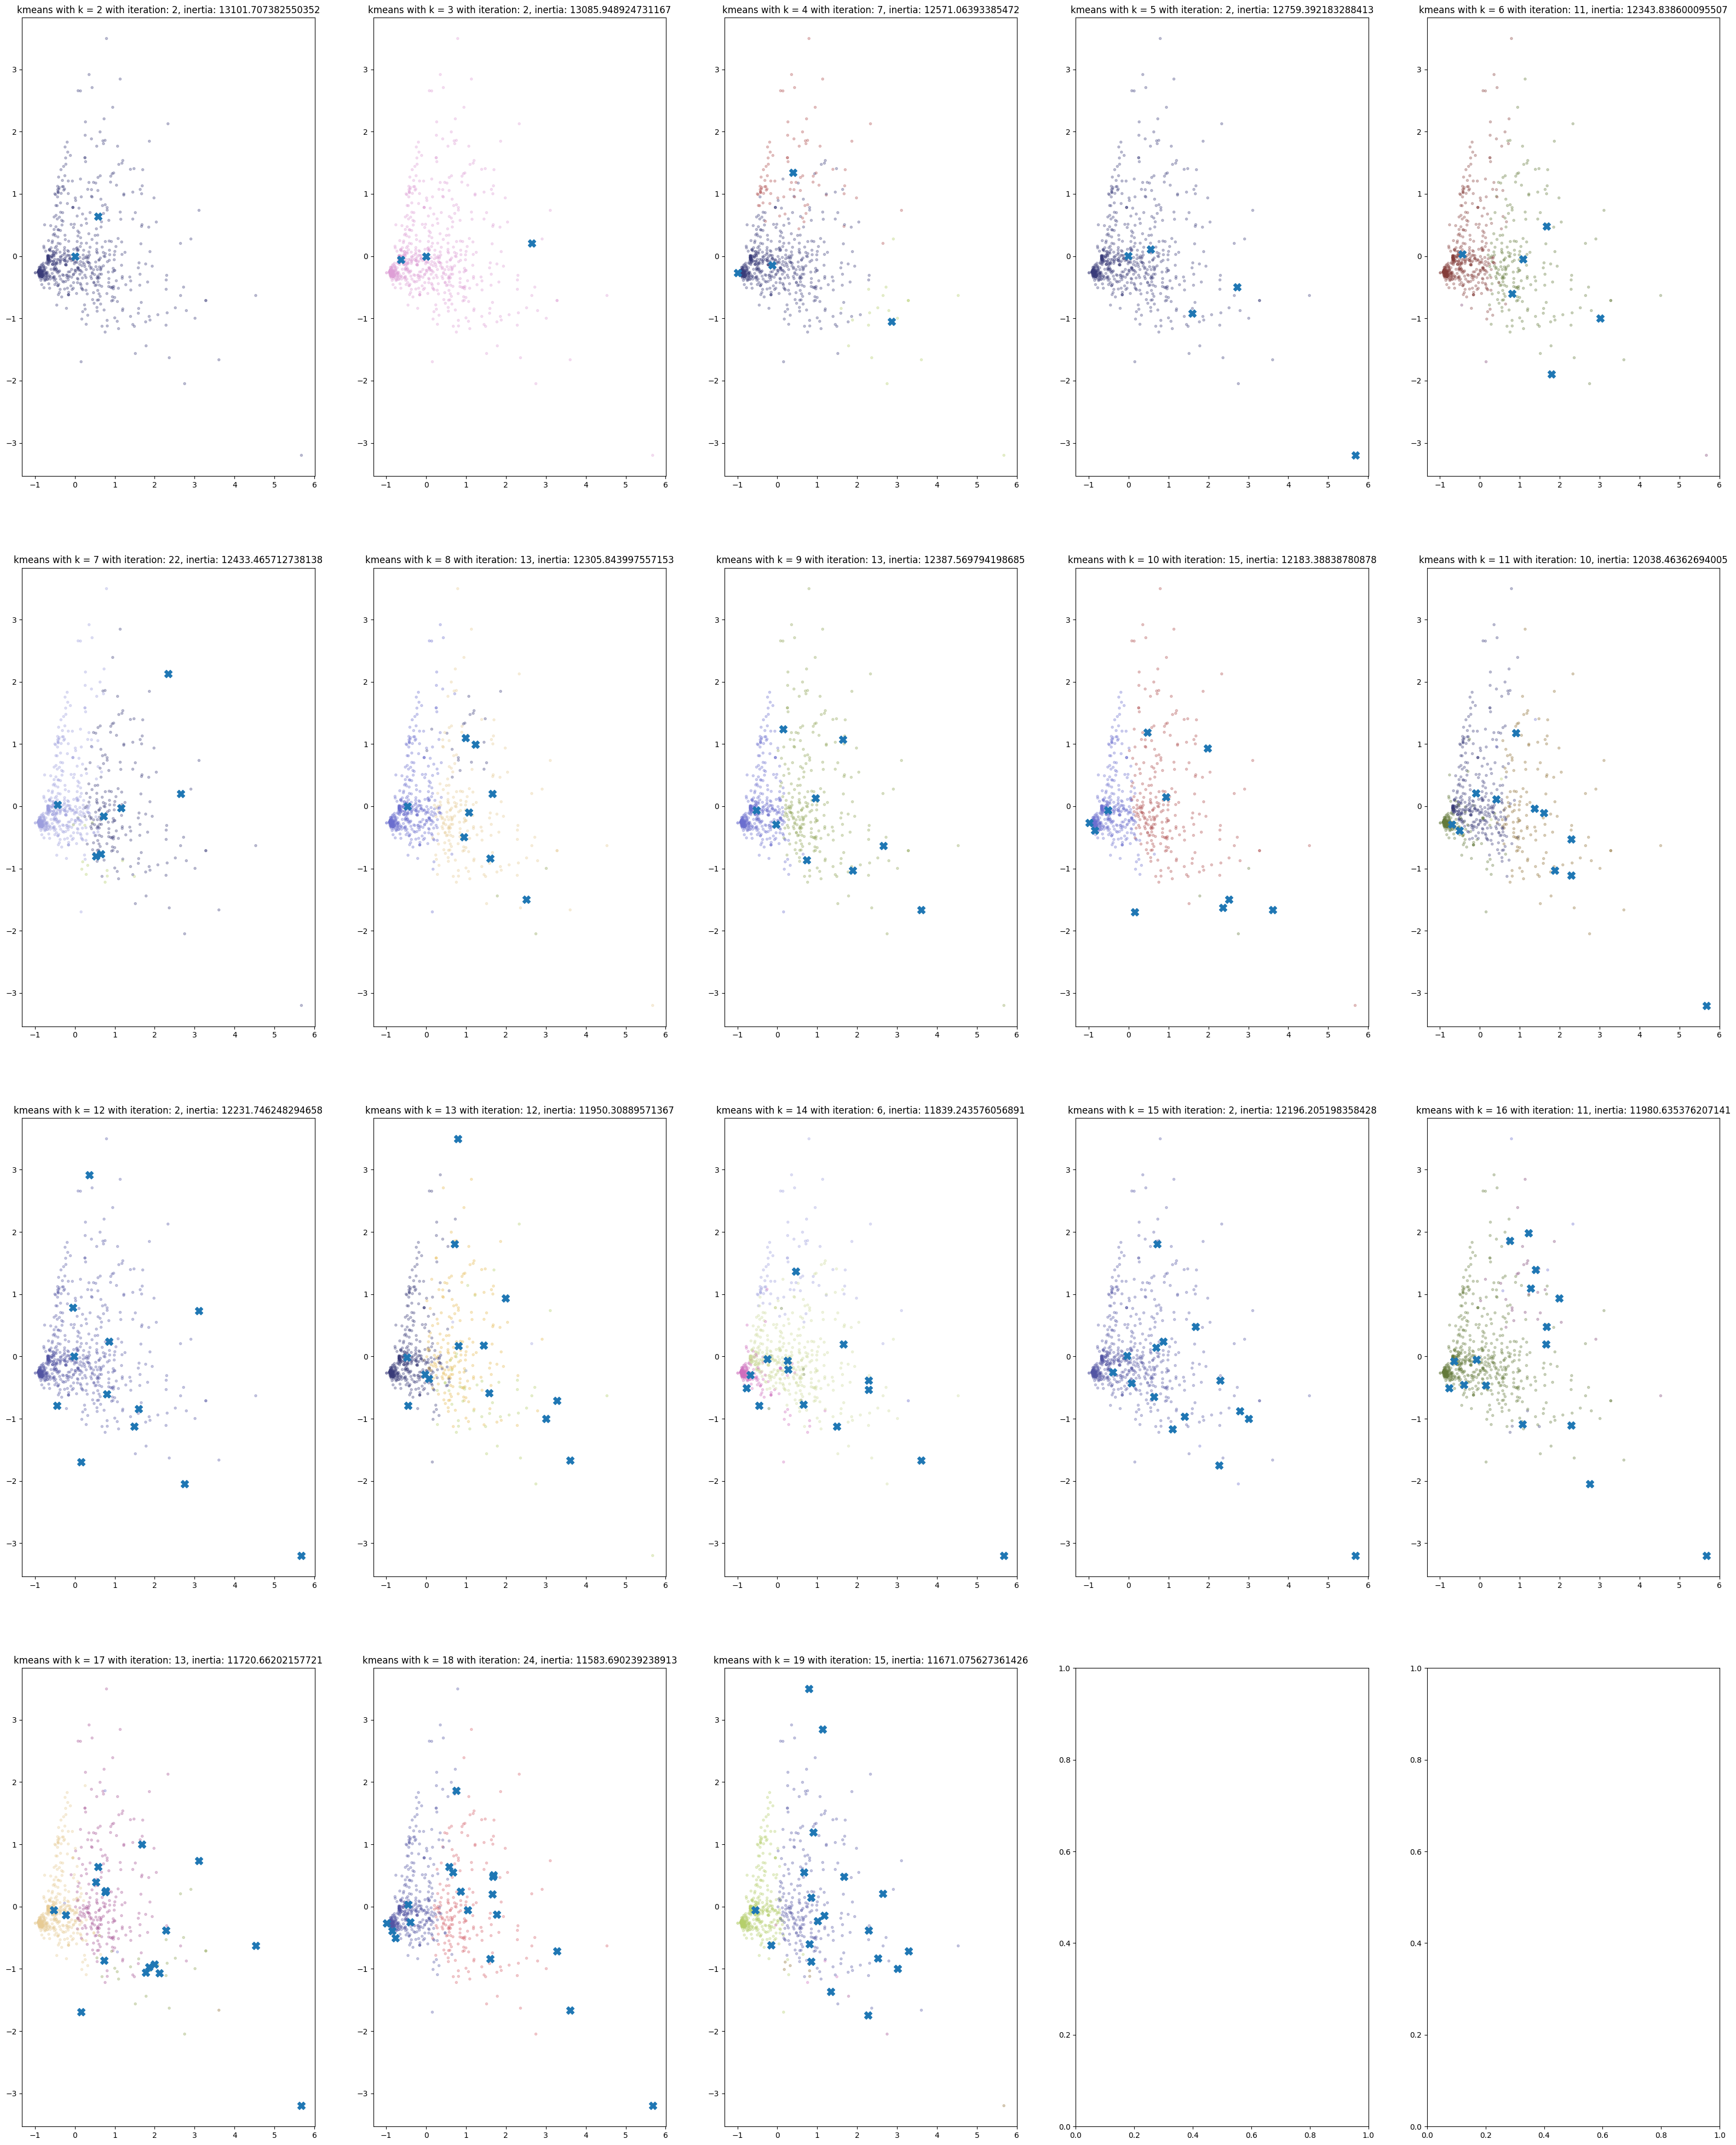

In [64]:
n_k = MAX_K - MIN_K + 1

ncols = 5
nrows = (n_k - 1)// ncols + 1

fix, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*nrows, 10*ncols))

for i,k in enumerate(result):
  row = i//5
  col = i%5

  centroids  = pca.transform(result[k]['centroids'])
  axs[row][col].scatter(transaction_2d[:,0], transaction_2d[:,1], marker='.', c=result[k]['labels'], alpha=0.3, cmap='tab20b')
  axs[row][col].scatter(centroids[:,0], centroids[:,1], marker='X', s=100, cmap='tab20b')
  axs[row][col].set_title(f'kmeans with k = {k} with iteration: {result[k]['n_iter']}, inertia: {result[k]["inertia"]}')
plt.show()

# Clustering evaluation


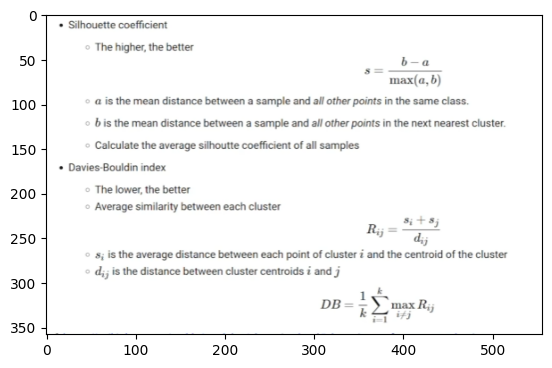

In [66]:
from PIL import Image
image = Image.open('cluster_evaluation.png')
plt.imshow(image)

In [71]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, silhouette_samples

In [74]:
scores = {'Sillhouette':{}, "DB-index":{},"Sillhouette-cityblock":{}, "SillhouetteSample":{}}
for i,k in enumerate(result):
  scores['Sillhouette'][k] = silhouette_score(transactions, result[k]['labels'])
  scores['DB-index'][k] = davies_bouldin_score(transactions, result[k]['labels'])
  scores['Sillhouette-cityblock'][k] = silhouette_score(transactions, result[k]['labels'], metric='cityblock')
  scores['SillhouetteSample'][k] = silhouette_samples(transactions, result[k]['labels'])
  print(f'kmean with k: {k}, silhouette: {scores["Sillhouette"][k]}, DB-index: {scores["DB-index"][k]}, silhouette-cityblock: {scores["Sillhouette-cityblock"][k]}')

kmean with k: 2, silhouette: 0.3201657026023433, DB-index: 0.5370402735381155, silhouette-cityblock: 0.4949837366113894
kmean with k: 3, silhouette: -0.11578113645813691, DB-index: 0.9741766224507954, silhouette-cityblock: -0.2733006766668461
kmean with k: 4, silhouette: 0.13939690544795644, DB-index: 3.237578079081643, silhouette-cityblock: 0.237038882384476
kmean with k: 5, silhouette: 0.21606088003361967, DB-index: 0.5152587901434729, silhouette-cityblock: 0.3339364708156599
kmean with k: 6, silhouette: 0.1724015061884801, DB-index: 2.423308951194853, silhouette-cityblock: 0.2662139223238282
kmean with k: 7, silhouette: 0.15177466365401296, DB-index: 2.325430390250443, silhouette-cityblock: 0.22427361170637572
kmean with k: 8, silhouette: 0.1705641061110906, DB-index: 2.325500785142225, silhouette-cityblock: 0.24952246847603685
kmean with k: 9, silhouette: 0.14981996887362298, DB-index: 1.748277268495265, silhouette-cityblock: 0.2123213024577914
kmean with k: 10, silhouette: 0.10559

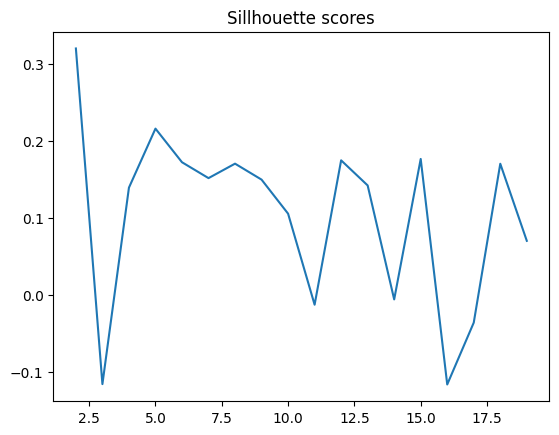

In [79]:
x,y = zip(*scores['Sillhouette'].items())
plt.plot(x,y)
plt.title("Sillhouette scores")
plt.show()

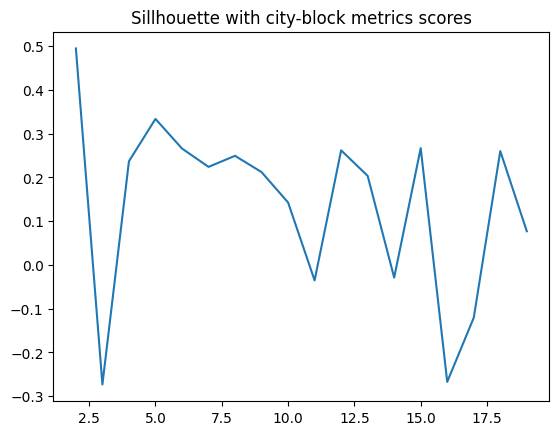

In [81]:
x,y = zip(*scores['Sillhouette-cityblock'].items())
plt.plot(x,y)
plt.title("Sillhouette with city-block metrics scores")
plt.show()

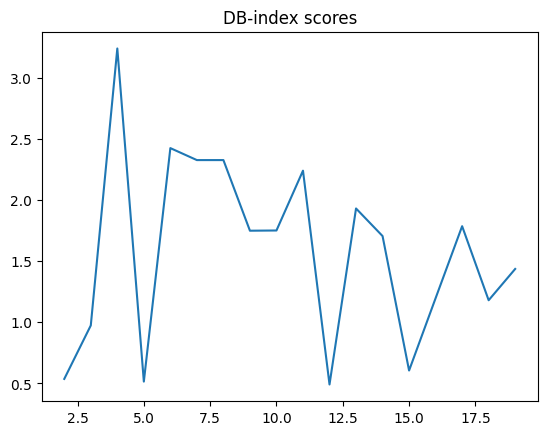

In [82]:
x,y = zip(*scores['DB-index'].items())
plt.plot(x,y)
plt.title("DB-index scores")
plt.show()

# Choosing k

# Elbow-method

In [94]:
len()

746

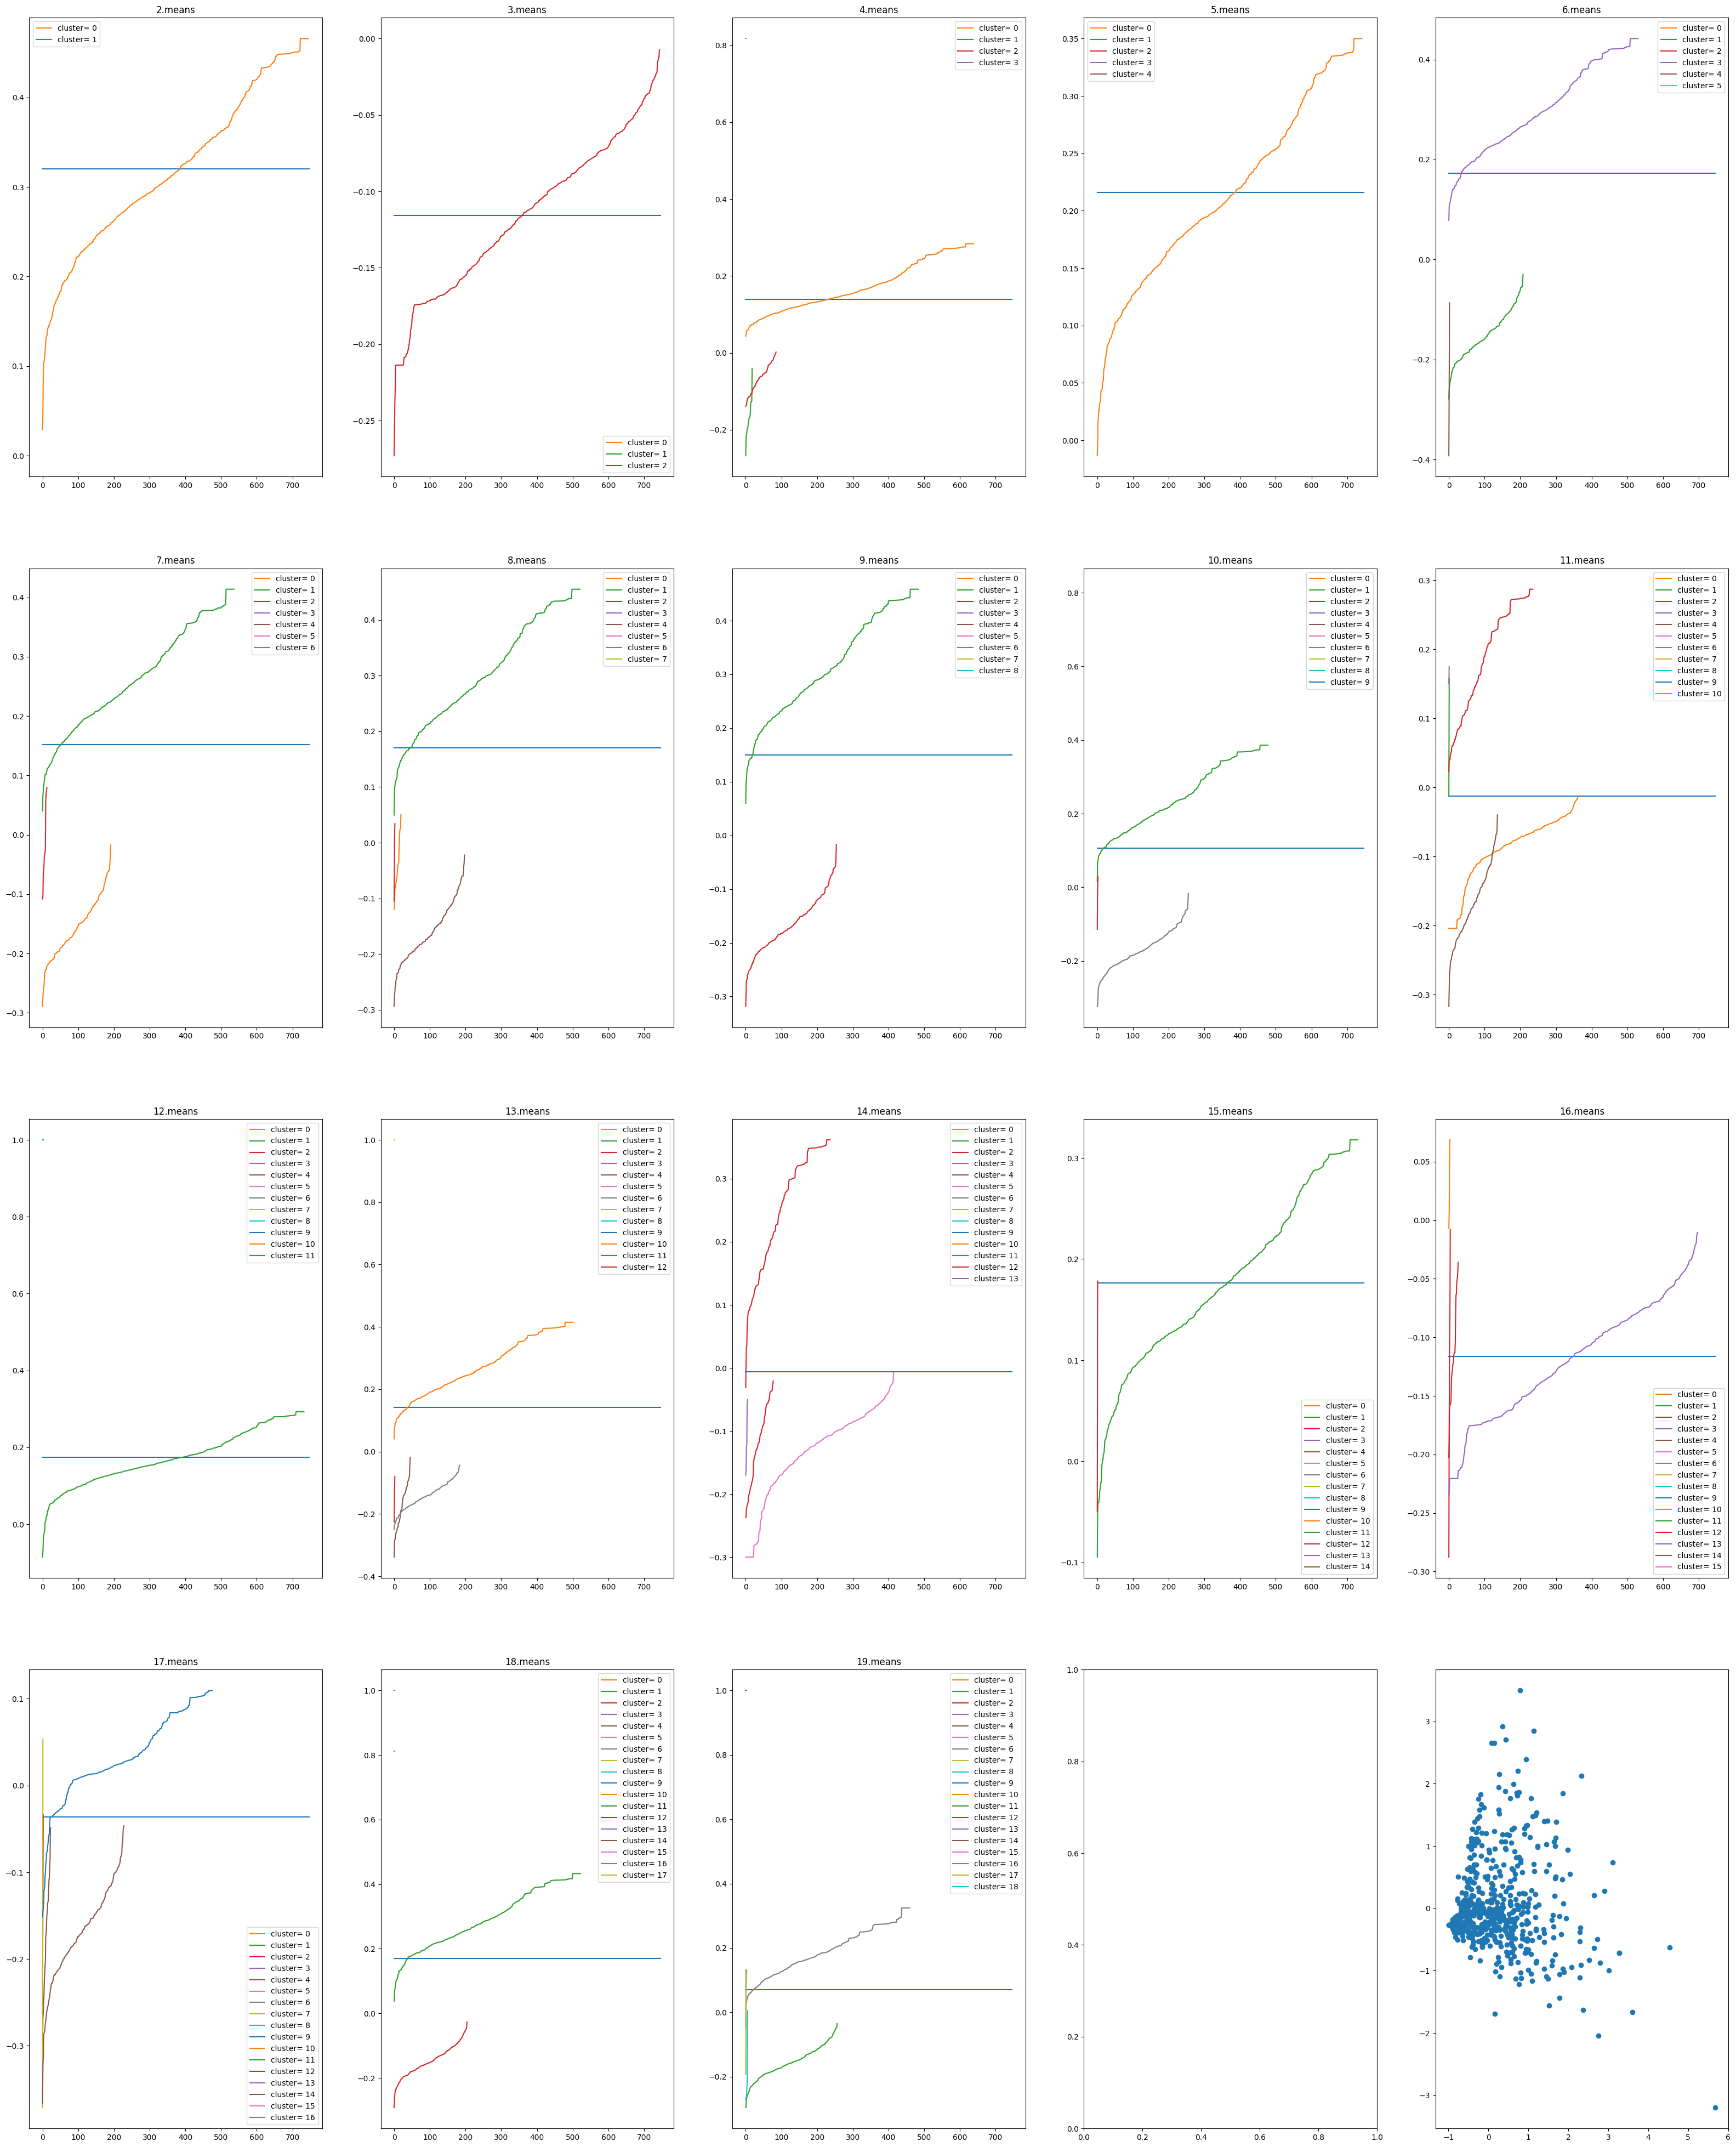

In [86]:
n_k = MAX_K - MIN_K + 1

ncols = 5
nrows = (n_k - 1)// ncols + 1

fix, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*nrows, 10*ncols))

for i,k in enumerate(result):
  row = i//5
  col = i%5
  axs[row][col].plot([0, len(scores['SillhouetteSample'][k])], [scores['Sillhouette'][k]]*2)
  for j in range(k):
    axs[row][col].plot(sorted(scores['SillhouetteSample'][k][result[k]['labels'] == j]), label=f'cluster= {j}')
  axs[row][col].set_title(f'{k}.means')
  axs[row][col].legend()

axs[nrows-1][ncols-1].scatter(transaction_2d[:,0], transaction_2d[:,1], marker='o')
plt.show()

# K-modes

In [99]:
!pip install kmodes

In [100]:
from kmodes.kmodes import KModes

In [101]:
results = {}
for k in range(MIN_K, MAX_K):
  kmodes = KModes(n_clusters=k)
  kmodes.fit(transactions)
  result[k] = {
      'labels':kmodes.labels_,
      'centroids':kmodes.cluster_centroids_,
      'inertia':kmodes.cost_,
      'n_iter':kmodes.n_iter_
  }
  print(f'kmeans with k={k}, iterations: {result[k]['n_iter']}, inertia: {result[k]["inertia"]}')

kmeans with k=2, iterations: 1, inertia: 13503.0
kmeans with k=3, iterations: 1, inertia: 13379.0
kmeans with k=4, iterations: 1, inertia: 13279.0
kmeans with k=5, iterations: 1, inertia: 13189.0
kmeans with k=6, iterations: 1, inertia: 13101.0
kmeans with k=7, iterations: 1, inertia: 13019.0
kmeans with k=8, iterations: 1, inertia: 12938.0
kmeans with k=9, iterations: 1, inertia: 12857.0
kmeans with k=10, iterations: 1, inertia: 12777.0
kmeans with k=11, iterations: 1, inertia: 12700.0
kmeans with k=12, iterations: 1, inertia: 12624.0
kmeans with k=13, iterations: 1, inertia: 12552.0
kmeans with k=14, iterations: 1, inertia: 12481.0
kmeans with k=15, iterations: 1, inertia: 12410.0
kmeans with k=16, iterations: 1, inertia: 12274.0
kmeans with k=17, iterations: 1, inertia: 12206.0
kmeans with k=18, iterations: 1, inertia: 12138.0
kmeans with k=19, iterations: 1, inertia: 12070.0


In [105]:
inertia = np.array([(k,result[k]['inertia']) for k in range(MIN_K, MAX_K)])

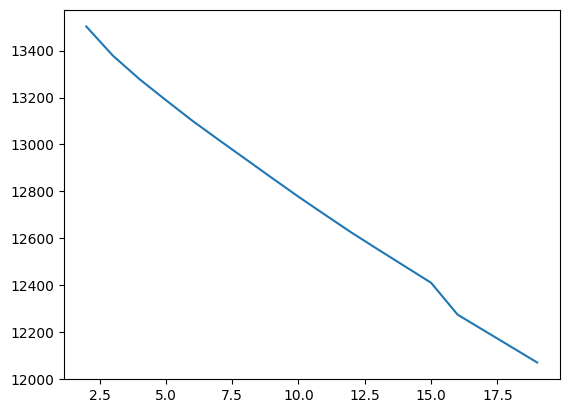

In [106]:
plt.plot(inertia[:,0],inertia[:,1])

# Historgram

In [115]:
result

{2: {'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 

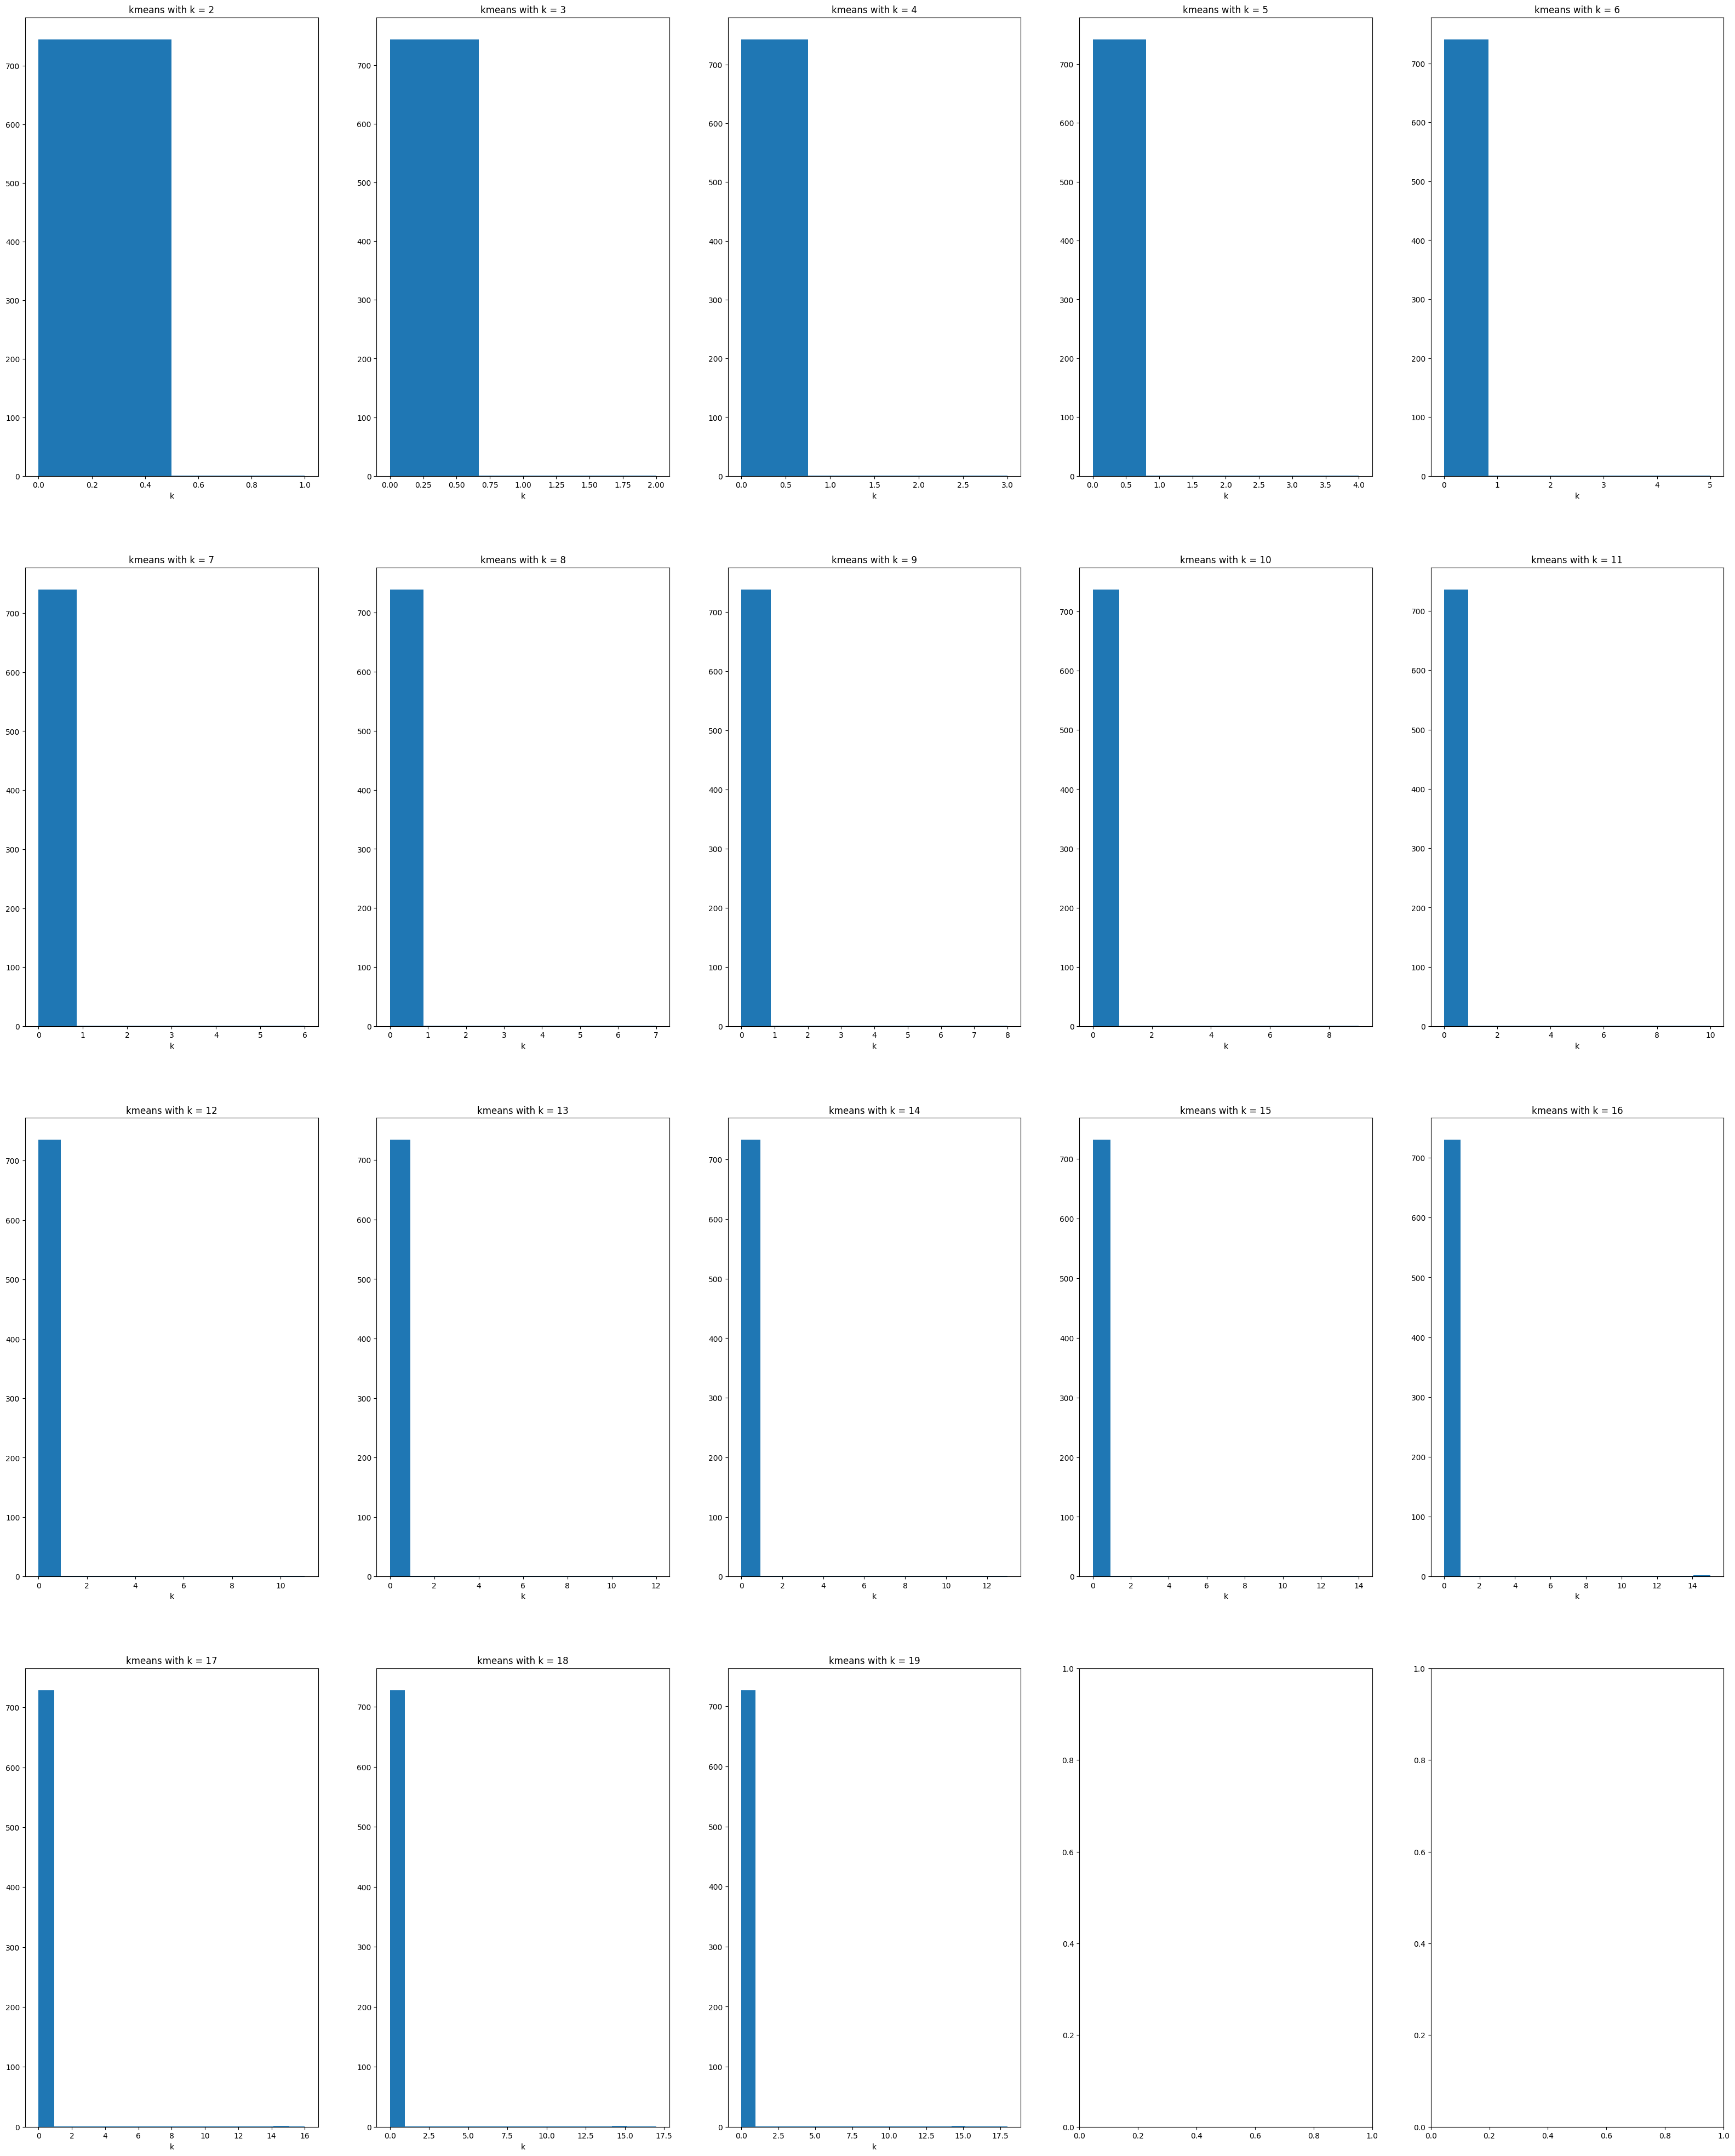

In [119]:
n_k = MAX_K - MIN_K + 1

ncols = 5
nrows = (n_k - 1)// ncols + 1

fix, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*nrows, 10*ncols))

for i,k in enumerate(result):
  row = i//5
  col = i%5
  axs[row][col].hist(result[k]['labels'], bins=k)
  axs[row][col].set_title(f'kmeans with k = {k}')
  axs[row][col].set_xlabel('k')
plt.show()

# Visualization

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/tmp/ipython-input-608308874.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[row][col].scatter(centroids[:,0], centroids[:,1], marker='X', s=100, cmap='tab20b')
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/tmp/ipython-input-608308874.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  axs[row][col].scatter(centroids[:,0], centroids[:,1], marker='X', s=100, cmap='tab20b')
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/tmp/ipython-input-608308874.py

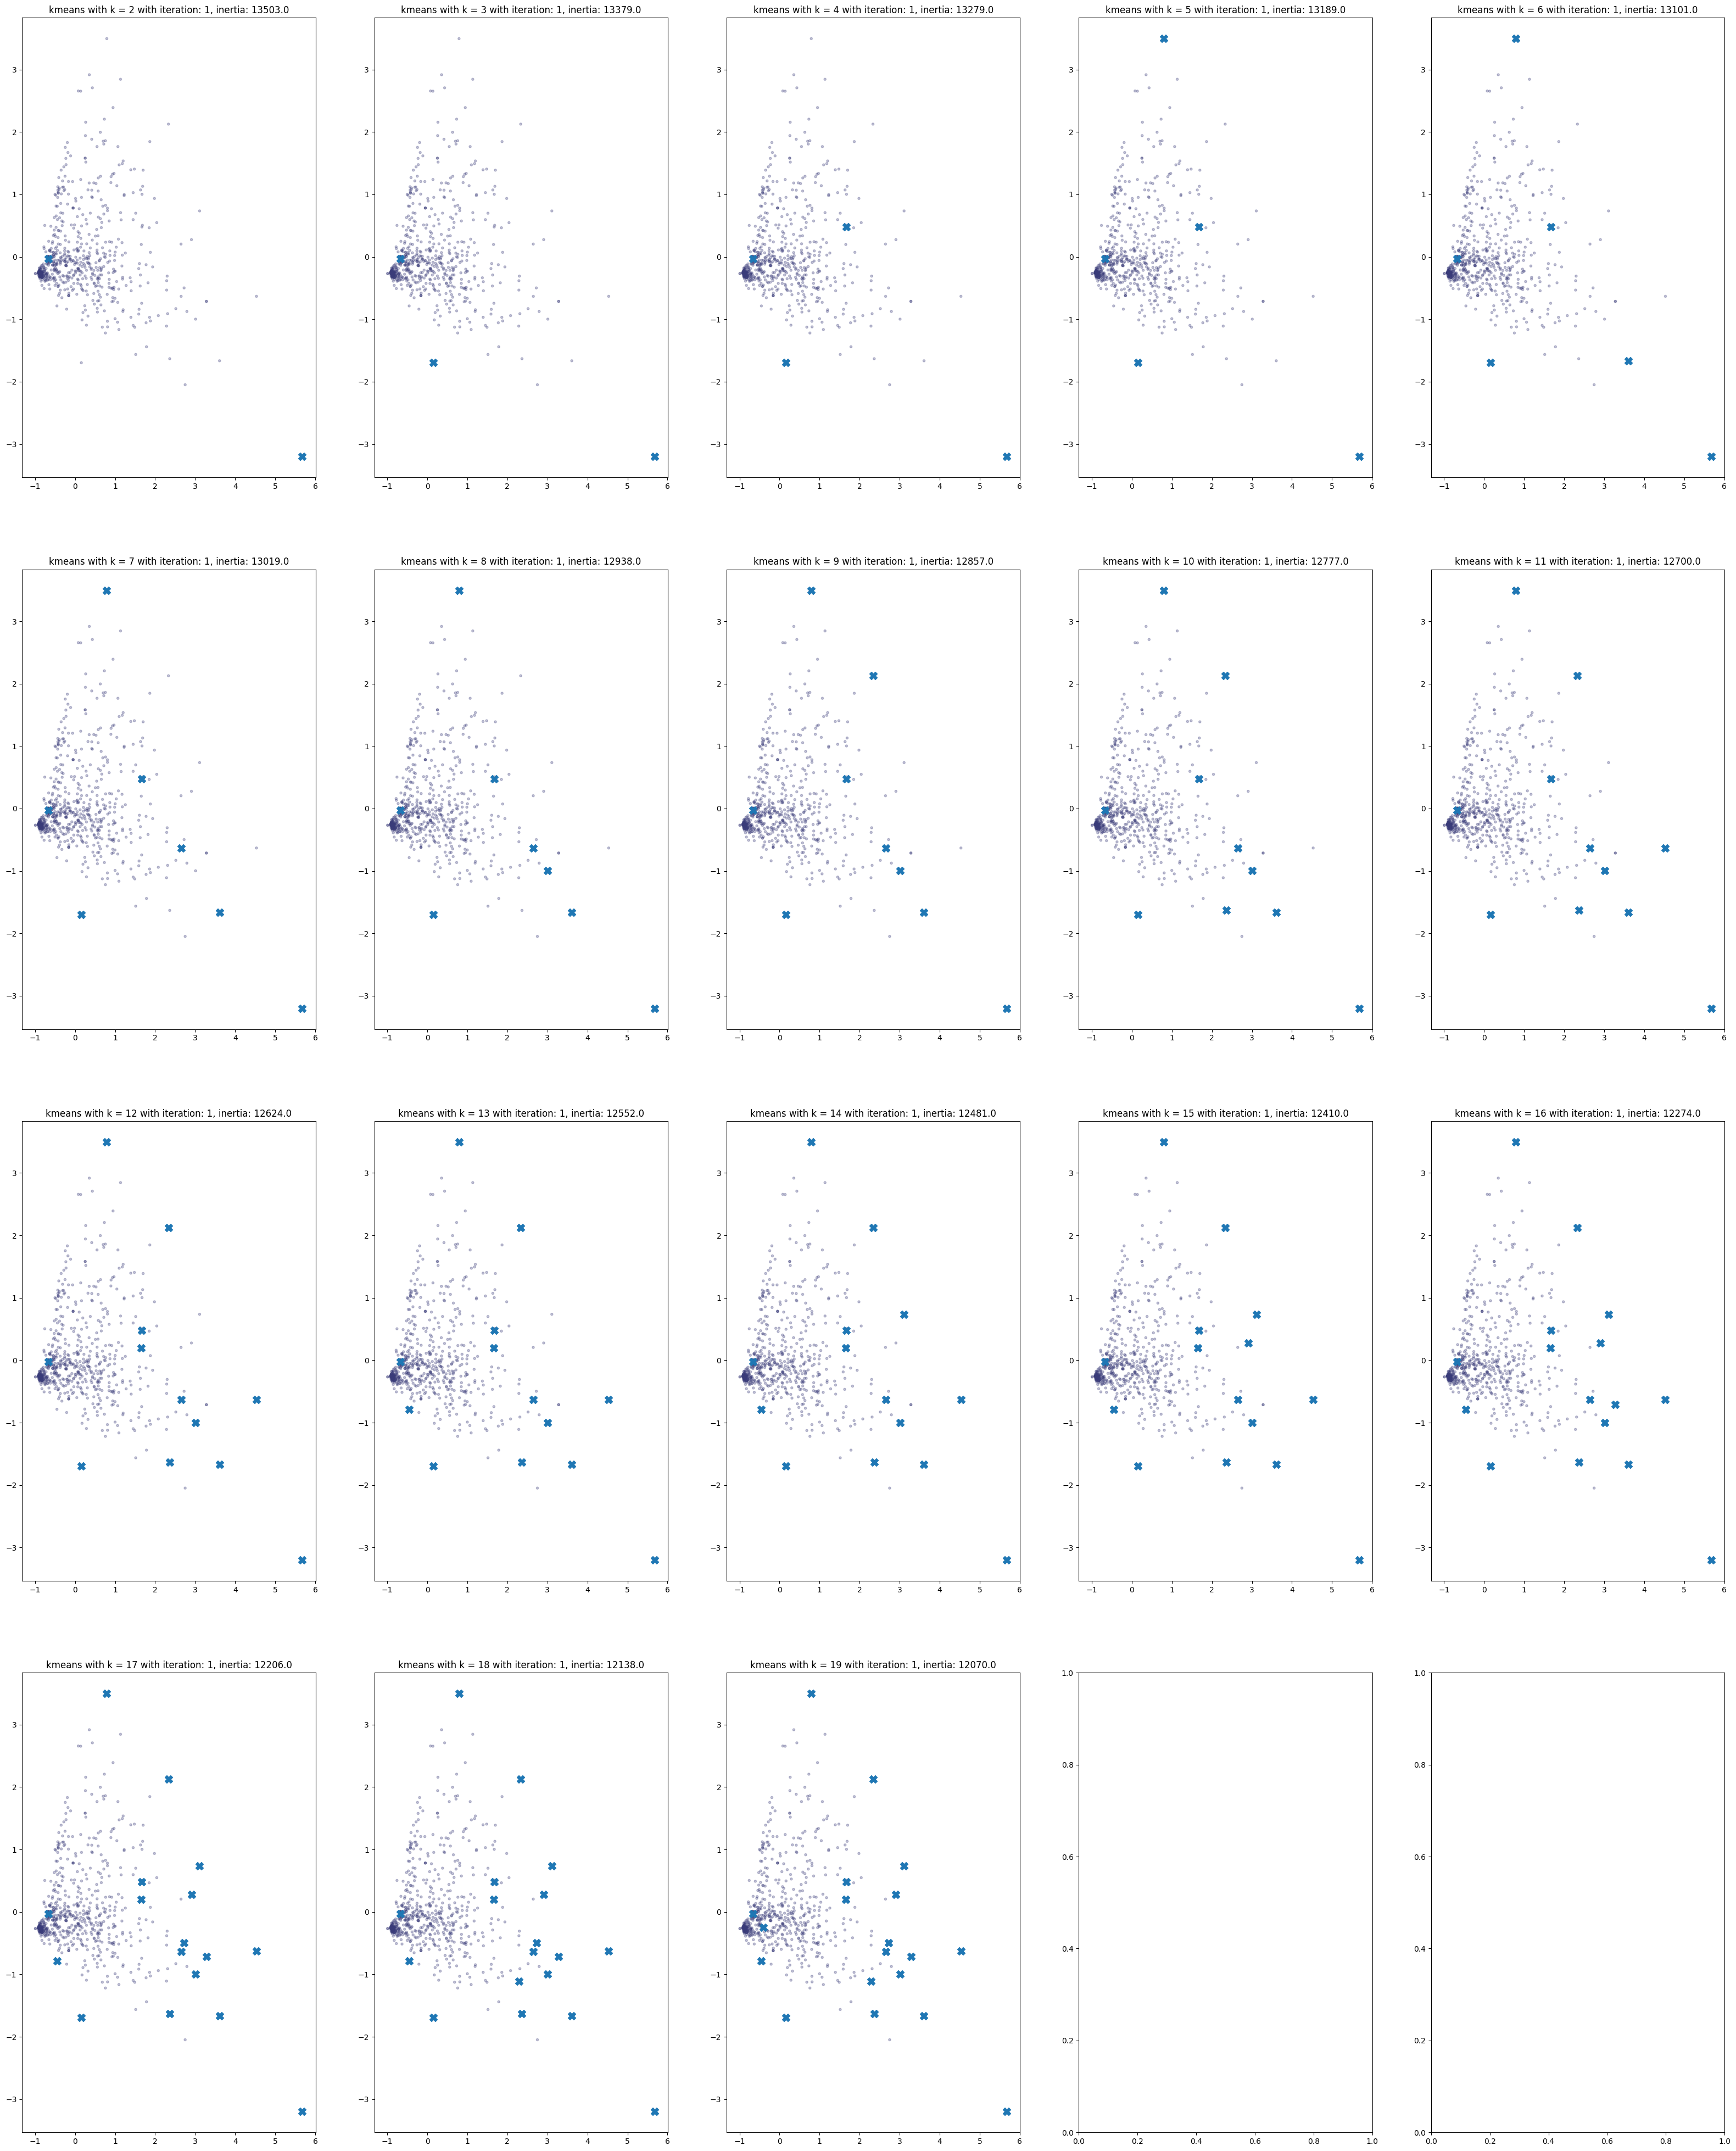

In [120]:
n_k = MAX_K - MIN_K + 1

ncols = 5
nrows = (n_k - 1)// ncols + 1

fix, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10*nrows, 10*ncols))

for i,k in enumerate(result):
  row = i//5
  col = i%5

  centroids  = pca.transform(result[k]['centroids'])
  axs[row][col].scatter(transaction_2d[:,0], transaction_2d[:,1], marker='.', c=result[k]['labels'], alpha=0.3, cmap='tab20b')
  axs[row][col].scatter(centroids[:,0], centroids[:,1], marker='X', s=100, cmap='tab20b')
  axs[row][col].set_title(f'kmeans with k = {k} with iteration: {result[k]['n_iter']}, inertia: {result[k]["inertia"]}')
plt.show()